In [1]:
#importer les fichiers que nous avons besoins 
import requests 
import pandas 
from datetime import date
from datetime import timedelta
#format pour les nombres 
pandas.options.display.float_format = '{:.2f}'.format
#créer la valeur "Hier" pour avoir automatiquement la dernière colonne du tableau soit la dernière journée. 
#car la mise à jour se fait souvent le soir. Donc il est possible que le fichier ne contiennent pas les données "d'aujourd'hui"
today = date.today()
hier = today - timedelta (days = 1)
hier = hier.strftime("%#m/%#d/%y")

# Dans le fichier le nombre afficher à chque jour est le nouveau nombre de cas (ou de décès) par région 
# À partir du 22 janvier 2020 

#Lien pour les CAS https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv

#Lien pour les DÉCÈS https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv

#Lien pour les rétablisssements https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv

In [40]:
#Faire un tableau du nb de cas au canada par (région/province) Province/State

fichier_cas = pandas.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv", sep = "," )

cas_can = fichier_cas[fichier_cas["Country/Region"] == "Canada"]
#Retirer les bâteaux de croisières
cas_can = cas_can.drop([231,238,37])
cas_can = cas_can.sort_values(by=[hier],ascending=False)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20
44,Quebec,Canada,52.94,-73.55,0,0,0,0,0,0,...,2024,2498,2840,3430,4162,4611,5518,6101,6101,7944
42,Ontario,Canada,51.25,-85.32,0,0,0,0,1,1,...,994,1144,1355,1706,1966,2392,2793,3255,3630,4354
36,British Columbia,Canada,49.28,-123.12,0,0,0,0,0,0,...,725,884,884,970,1013,1013,1121,1174,1203,1203
35,Alberta,Canada,53.93,-116.58,0,0,0,0,0,0,...,542,542,621,661,690,754,969,969,1075,1181
41,Nova Scotia,Canada,44.68,-63.74,0,0,0,0,0,0,...,90,110,122,127,147,173,193,207,236,262
45,Saskatchewan,Canada,52.94,-106.45,0,0,0,0,0,0,...,95,134,156,156,184,193,206,220,220,249
40,Newfoundland and Labrador,Canada,53.14,-57.66,0,0,0,0,0,0,...,102,120,135,148,152,175,183,195,195,217
38,Manitoba,Canada,53.76,-98.81,0,0,0,0,0,0,...,39,64,72,96,103,127,167,182,182,203
39,New Brunswick,Canada,46.57,-66.46,0,0,0,0,0,0,...,45,51,66,68,70,81,91,91,91,98
43,Prince Edward Island,Canada,46.51,-63.42,0,0,0,0,0,0,...,9,11,11,18,21,21,22,22,22,22


In [30]:
#Graphique Provinces du Canada. nb de cas par jour depuis le début 
#Faire le graphique 
import seaborn 



#CAN_CAS = cas_can.pivot(index= None, columns='Province/State',values= ['1/22/20']) 
#CAN_CAS

#seaborn.lineplot(data=cas_can)



SyntaxError: invalid syntax (<ipython-input-30-62aeac3935cf>, line 7)

[Text(0, 0, 'Quebec'),
 Text(0, 0, 'Ontario'),
 Text(0, 0, 'British Columbia'),
 Text(0, 0, 'Alberta'),
 Text(0, 0, 'Nova Scotia'),
 Text(0, 0, 'Saskatchewan'),
 Text(0, 0, 'Newfoundland and Labrador'),
 Text(0, 0, 'Manitoba'),
 Text(0, 0, 'New Brunswick'),
 Text(0, 0, 'Prince Edward Island'),
 Text(0, 0, 'Yukon'),
 Text(0, 0, 'Northwest Territories')]

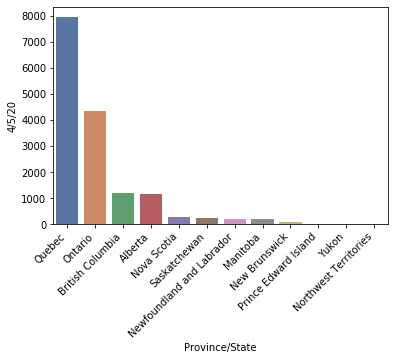

In [41]:
#Graphique nb de cas par Province 
graph = seaborn.barplot(x="Province/State", y=hier, palette="deep", data=cas_can)

graph.set_xticklabels(graph.get_xticklabels(), rotation=45, horizontalalignment='right')
